# Assignment7B

C:\Users\Famiglia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Famiglia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


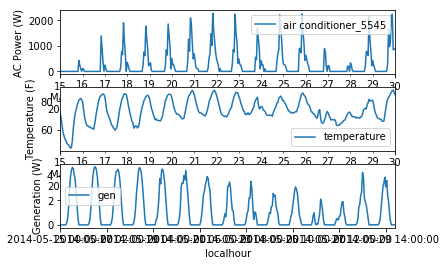

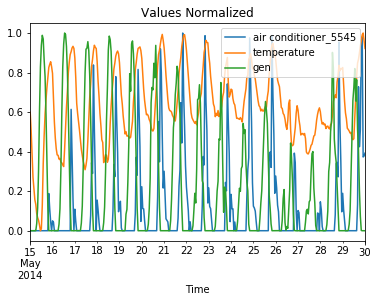

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import os 

ExternalFileFolder = r"C:\Users\Famiglia\Documents\Manuel\Polimi\MAGISTRALE\PRIMO ANNO\Primo semestre\Bezhad\python4ScientificComputing_Numpy_Pandas_MATPLotLIB\ExternalFiles"
ConsumptionFileName="consumption_5545.csv"
TemperatureFileName="Austin_weather_2014.csv"
IrradiationFileName="irradiance_2014_gen.csv"

path_consumptionFile= os.path.join(ExternalFileFolder,ConsumptionFileName)
path_TemperatureFile=os.path.join(ExternalFileFolder,TemperatureFileName)
path_IrradiationFile=os.path.join(ExternalFileFolder,IrradiationFileName)

#CONSUMPTION

DF_consumption= pd.read_csv(path_consumptionFile, sep=",", index_col=0)

Previous_index=DF_consumption.index
NewParsedIndex = pd.to_datetime(Previous_index)
DF_consumption.index=NewParsedIndex

DF_consumption_may=DF_consumption["2014-05-15 00:00:00":"2014-05-30 00:00:00"]

#TEMPERATURE

DF_weather= pd.read_csv(path_TemperatureFile, sep=";", index_col=0)

PreviousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(PreviousIndex_weather)
DF_weather.index=newIndex_weather

Series_Temperature=DF_weather["temperature"]

DF_Temperature=DF_weather[["temperature"]]

DF_Temperature_may=DF_Temperature["2014-05-15 00:00:00":"2014-05-30 00:00:00"]

#IRRADIATION (PHOTOVOLTAIC GENERATION)

DF_irradianceSource= pd.read_csv(path_IrradiationFile, sep=";", index_col=1)

DF_irradiance=DF_irradianceSource[["gen"]]

negative_irradiance=DF_irradiance["gen"]<0  
DF_irradiance.loc[negative_irradiance]=0

DF_irradiance_may=DF_irradiance["2014-05-15 00:00:00":"2014-05-30 00:00:00"]


DF_joined_may=DF_consumption_may.join([DF_Temperature_may,DF_irradiance_may])
DF_joined_may_cleaned=DF_joined_may.dropna()
DF_joined_may_min=DF_joined_may_cleaned.min()
DF_joined_may_max=DF_joined_may_cleaned.max()

DF_joined_may_norm=(DF_joined_may_cleaned-DF_joined_may_min)/(DF_joined_may_max-DF_joined_may_min)

fig,ax=plt.subplots(3)
DF_consumption_may.plot(ax=ax[0])
ax[0].set_ylabel("AC Power (W)")

DF_Temperature_may.plot(ax=ax[1])
ax[1].set_ylabel("Temperature (F)")

DF_irradiance_may.plot(ax=ax[2])
ax[2].set_ylabel("Generation (W)")

plt.show()

plt.figure()
DF_joined_may_norm.plot()
plt.xlabel("Time")
plt.title("Values Normalized")
plt.show()